In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

##### Exercise 11.2

In [2]:
# Superparameters
n_epochs = 40
n_neurons = [6, 1]
activation_functions = ["tanh", "relu"]
# The output (for each run) is a single number, so
# the last layer must have a single unit.
n_layers = len(n_neurons)
n_training_data = 100

In [3]:
# Generate training inputs
np.random.seed(0)
in_training   = np.random.uniform(-1, 1, n_training_data)
in_validation = np.random.uniform(-1, 1, 50)
in_validation.sort()

def polynomial3(x, p):
    return p[0] + p[1] * x + p[2] * x**2 + p[3] * x**3
target_parameters = [4, -3, -2, 3]
out_target = polynomial3(in_validation, target_parameters)
# This is the data set that the machine should learn to calculate.

sigma = 0.1 # Standard deviation of Gaussian noise (zero ATM)
out_training   = np.random.normal(polynomial3(in_training, target_parameters), sigma)
out_validation = np.random.normal(polynomial3(in_validation, target_parameters), sigma)

###### Definition of the neural network

In [4]:
model = tf.keras.Sequential()
for layer in range(n_layers):
    if layer == 0:
        model.add(Dense(
            n_neurons[layer],
            input_shape = (1,),
            activation = activation_functions[layer]
        ))
    else:
        model.add(Dense(
            n_neurons[layer],
            activation = activation_functions[layer]
        ))
    
# Compile the model choosing the optimizer, loss and metrics objects.
model.compile(optimizer = "sgd", loss = "mean_absolute_error", metrics = ["mse"])

###### Summary of the model

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


###### Training

In [6]:
# Evaluate the model using the "training" dataset,
# over 10 epochs of 32 batch size each
history = model.fit(
    x = in_training,
    y = out_training,
    batch_size = 32,
    epochs = n_epochs,
    shuffle = True, # It is a good idea to shuffle the input before each epoch.
    validation_data = (in_validation, out_validation)
)

Train on 100 samples, validate on 50 samples
Epoch 1/40
100/100 [==============================] - 0s 4ms/step - loss: 3.0581 - mean_squared_error: 10.1478 - val_loss: 3.0314 - val_mean_squared_error: 9.9752
Epoch 2/40
100/100 [==============================] - 0s 105us/step - loss: 3.0184 - mean_squared_error: 9.8812 - val_loss: 3.0069 - val_mean_squared_error: 9.7938
Epoch 3/40
100/100 [==============================] - 0s 92us/step - loss: 2.9793 - mean_squared_error: 9.6306 - val_loss: 2.9781 - val_mean_squared_error: 9.5851
Epoch 4/40
100/100 [==============================] - 0s 91us/step - loss: 2.9310 - mean_squared_error: 9.3197 - val_loss: 2.9336 - val_mean_squared_error: 9.2711
Epoch 5/40
100/100 [==============================] - 0s 97us/step - loss: 2.8691 - mean_squared_error: 8.9363 - val_loss: 2.8896 - val_mean_squared_error: 8.9694
Epoch 6/40
100/100 [==============================] - 0s 91us/step - loss: 2.8099 - mean_squared_error: 8.5711 - val_loss: 2.8424 - val_mea

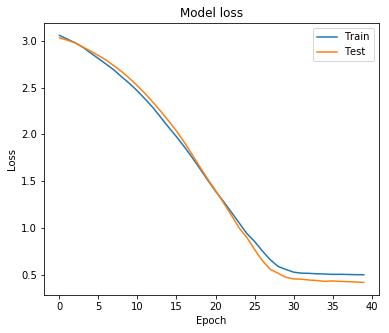

In [7]:
# look into training history
# Plot training & validation loss values
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))

axes.plot(history.history["loss"]) # Loss on training samples
axes.plot(history.history["val_loss"]) # Loss on validation samples
axes.set_title("Model loss")
axes.set_ylabel("Loss")
axes.set_xlabel("Epoch")
axes.legend(["Train", "Test"], loc = "best")

plt.show()

###### Predictions

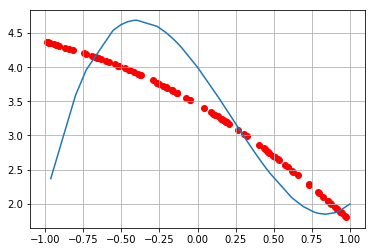

In [8]:
in_predicted = np.random.uniform(-1, 1, 100)
out_predicted = model.predict(in_predicted)
plt.scatter(in_predicted, out_predicted, color = "red", label = "Prediction")
plt.plot(in_validation, out_target)
# in_target == in_validation
plt.grid(True)
plt.show()